In [14]:
# Import necessary libraries
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Path to the zip file for fire dataset
zip_path = os.path.join(os.getcwd(), 'archive (4).zip')

# Extract the dataset
extract_path = "dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Path to the fire dataset
data_dir = os.path.join(extract_path, 'fire_dataset')

# Function to unzip the dataset
def unzip_dataset(zip_path, extract_to='dataset'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Dataset extracted to {extract_to}")

# Input path of the zip file
zip_file_path = input("Enter the full path to your dataset zip file: ")

# Unzip the dataset
unzip_dataset(zip_file_path)


# Correct dataset path
dataset_dir = os.path.join(extract_path, 'fire_dataset')  # Adjusted path
fire_dir = os.path.join(dataset_dir, 'fire_images')  # Update folder name
no_fire_dir = os.path.join(dataset_dir, 'no_fire_images')  # Update folder name

# Check if directories exist before listing files
if os.path.exists(fire_dir) and os.path.exists(no_fire_dir):
    print("Fire images:", len(os.listdir(fire_dir)))
    print("No fire images:", len(os.listdir(no_fire_dir)))
else:
    print("Error: One or more dataset directories are missing. Check extraction path.")



Enter the full path to your dataset zip file:  archive (4).zip


Dataset extracted to dataset
Error: One or more dataset directories are missing. Check extraction path.


In [16]:
import os

extract_path = "dataset"  # The folder where your dataset should be extracted
print("Extracted folder contents:", os.listdir(extract_path))


Extracted folder contents: ['fire_dataset']


In [28]:
# Set dataset path
dataset_dir = os.path.join(extract_path, 'fire_dataset')  # Adjusted path
fire_dir = os.path.join(dataset_dir, 'fire_images')  # Correct subfolder
no_fire_dir = os.path.join(dataset_dir, 'non_fire_images')  # Correct subfolder

# Check if directories exist before listing files
if os.path.exists(fire_dir) and os.path.exists(no_fire_dir):
    print("Fire images:", len(os.listdir(fire_dir)))
    print("No fire images:", len(os.listdir(no_fire_dir)))
else:
    print("Error: One or more dataset directories are missing. Check extraction path.")


Fire images: 756
No fire images: 244


Found 801 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


NameError: name 'history' is not defined

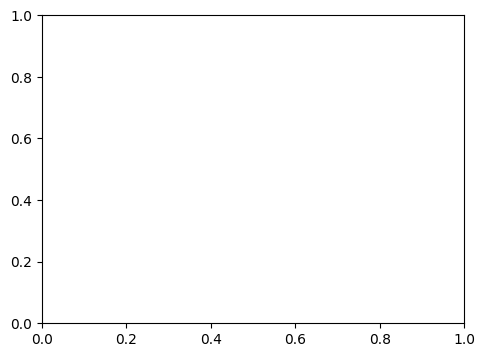

In [30]:
# Preprocess the data
img_size = (380, 380)  # EfficientNetB4 input size
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the dataset
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model
model.save('fire_detection_efficientnet_b4.h5')
print("Model saved as fire_detection_efficientnet_b4.h5")


Enter the full path to your dataset zip file:  archive (4).zip


Dataset extracted to dataset
Fire images: 756
No fire images: 244
Found 801 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.6755 - loss: 0.6229 - val_accuracy: 0.7656 - val_loss: 0.5832
Epoch 2/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1:40 4s/step - accuracy: 0.6562 - loss: 0.7955

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6562 - loss: 0.7955 - val_accuracy: 0.7604 - val_loss: 0.5908
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 6s/step - accuracy: 0.7868 - loss: 0.5237 - val_accuracy: 0.7500 - val_loss: 0.5608
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7188 - loss: 0.6017 - val_accuracy: 0.7604 - val_loss: 0.5469
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.7598 - loss: 0.5492 - val_accuracy: 0.7604 - val_loss: 0.5403
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8125 - loss: 0.4997 - val_accuracy: 0.7500 - val_loss: 0.5505
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.7430 - loss: 0.5647 - val_accuracy: 0.7552 - val_loss: 0.5379
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6875 - loss: 0.6523 - val_accuracy: 0.7656 - val_loss: 0.5279
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.7689 - loss: 0.5310 - val_accuracy: 0.7604 - val_loss: 0.5427

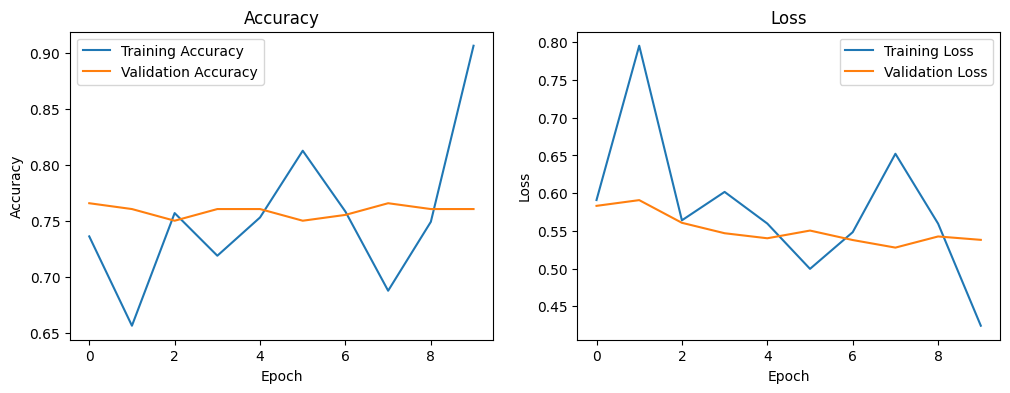

Model saved as fire_detection_efficientnet_b4.h5


In [10]:
# Import necessary libraries
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Function to unzip the dataset
def unzip_dataset(zip_path, extract_to='dataset'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Dataset extracted to {extract_to}")

# Input path of the zip file
zip_file_path = input("Enter the full path to your dataset zip file: ")

# Unzip the dataset
unzip_dataset(zip_file_path)

# Define paths
dataset_dir = 'dataset'
fire_dir = os.path.join(dataset_dir, 'fire')
no_fire_dir = os.path.join(dataset_dir, 'no_fire')

# Set dataset path
dataset_dir = os.path.join('dataset', 'fire_dataset')  # Adjusted path
fire_dir = os.path.join(dataset_dir, 'fire_images')  # Correct subfolder
no_fire_dir = os.path.join(dataset_dir, 'non_fire_images')  # Correct subfolder

# Check if directories exist before listing files
if os.path.exists(fire_dir) and os.path.exists(no_fire_dir):
    print("Fire images:", len(os.listdir(fire_dir)))
    print("No fire images:", len(os.listdir(no_fire_dir)))
else:
    print("Error: One or more dataset directories are missing. Check extraction path.")

# Preprocess the data
img_size = (380, 380)  # EfficientNetB4 input size
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the dataset
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load EfficientNetB4 model (pretrained on ImageNet)
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(380, 380, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model
model.save('fire_detection_efficientnet_b4.h5')
print("Model saved as fire_detection_efficientnet_b4.h5")


In [13]:

from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('fire_detection_efficientnet_b4.h5')


In [17]:
# Recompile the model if necessary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('fire_detection_efficientnet_b4.h5')

# Recompile the model (optional, just to avoid the warning if you plan to evaluate/train later)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the image for prediction
img_path = r"C:\Users\Lenovo\Downloads\images (3).jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(380, 380))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale the image

# Make the prediction
prediction = model.predict(img_array)

# Interpret the result
if prediction[0] > 0.5:
    print("Prediction: Fire detected!")
else:
    print("Prediction: No fire detected!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: No fire detected!
